# K-Means Clustering – Theory

---

## 1. Definition
K-Means is an **unsupervised machine learning algorithm** used for **clustering**.  
It groups data points into **K clusters** based on feature similarity, where each cluster has a **centroid** representing its center.

---

## 2. Key Idea
- The algorithm tries to **minimize the distance** between points and their cluster centroid.  
- Steps of K-Means:
  1. Initialize **K centroids** randomly.  
  2. Assign each data point to the **nearest centroid**.  
  3. Recalculate centroids as the **mean of points** in each cluster.  
  4. Repeat steps 2–3 until **convergence** (no changes in assignments or centroids).

---

## 3. Applications
- Customer segmentation  
- Market basket analysis  
- Image compression  
- Anomaly detection  

---

## 4. Advantages
- Simple and easy to implement.  
- Works well on **large datasets**.  
- Efficient in grouping similar data points.  

---

## 5. Limitations
- Need to **specify K** (number of clusters) in advance.  
- Sensitive to **initial centroid placement**.  
- Assumes **spherical clusters**; not ideal for irregular shapes.  
- Sensitive to **outliers**.  

---

## 6. Model Training
- Available in `scikit-learn` via `KMeans`.  
- Key parameters:
  - `n_clusters`: Number of clusters (K)  
  - `init`: Initialization method (e.g., `'k-means++'`)  
  - `max_iter`: Maximum iterations to converge  
  - `random_state`: For reproducibility  
- After fitting, you can get:
  - `labels_`: Cluster assignment for each data point  
  - `cluster_centers_`: Coordinates of centroids


/tmp/ipython-input-2501735086.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Feature1'], data['Feature2'], s=50, cmap='viridis')


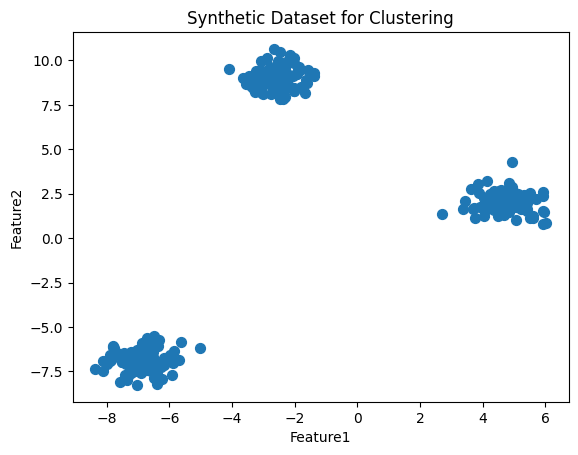

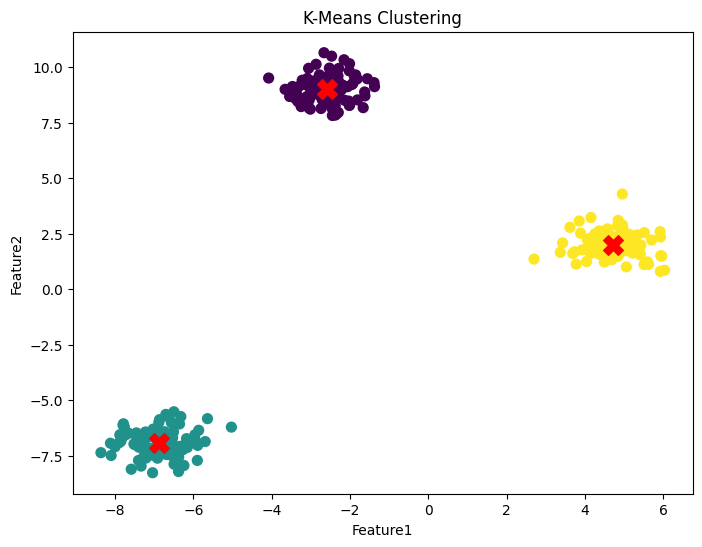

Cluster Centroids:
 [[-2.58361866  9.03185632]
 [-6.88217395 -6.94243433]
 [ 4.70421356  1.99562444]]


In [1]:
# ==============================
# K-Means Clustering
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Create a synthetic dataset with 2 features and 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# 2. Visualize the dataset
plt.scatter(data['Feature1'], data['Feature2'], s=50, cmap='viridis')
plt.title("Synthetic Dataset for Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# 3. Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)

# 4. Fit KMeans to the dataset
kmeans.fit(data)

# 5. Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 6. Add cluster labels to the DataFrame
data['Cluster'] = labels

# 7. Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(data['Feature1'], data['Feature2'], c=data['Cluster'], s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # centroids
plt.title("K-Means Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# 8. Print cluster centers
print("Cluster Centroids:\n", centroids)
